In [1]:
import pandas as pd
## load the dataset
df = pd.read_csv('CA_category_id.json')

### there is no null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries,     "kind": "youtube#videoCategoryListResponse" to }
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   {       0 non-null      float64
dtypes: float64(1)
memory usage: 4.9+ KB


In [3]:
df = pd.read_csv('CA_youtube_trending_data.csv')

### there is no null value in the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45145 entries, 0 to 45144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           45145 non-null  object
 1   title              45145 non-null  object
 2   publishedAt        45145 non-null  object
 3   channelId          45145 non-null  object
 4   channelTitle       45145 non-null  object
 5   categoryId         45145 non-null  int64 
 6   trending_date      45145 non-null  object
 7   tags               45145 non-null  object
 8   view_count         45145 non-null  int64 
 9   likes              45145 non-null  int64 
 10  dislikes           45145 non-null  int64 
 11  comment_count      45145 non-null  int64 
 12  thumbnail_link     45145 non-null  object
 13  comments_disabled  45145 non-null  bool  
 14  ratings_disabled   45145 non-null  bool  
 15  description        44848 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

0        KX06ksuS6Xo
1        J78aPJ3VyNs
2        M9Pmf9AB4Mo
3        3C66w5Z0ixs
4        VIUo6yapDbc
            ...     
45140    5vteamflh1E
45141    l34boCGuYZU
45142    9yDvp0cx3TY
45143    DRE8nivsoxY
45144    hxL9SWeGe8A
Name: video_id, Length: 45145, dtype: object

In [21]:
df['description'][0]

'CLASH official music video performed by DILJIT DOSANJH from his album G.O.A.T. Listen to the full album on Spotify ►https://spoti.fi/DiljitDosanjh_GOATFollow Diljit Dosanjh on Spotify ► https://spoti.fi/301R7wj Song: CLASHAlbum: G.O.A.T. Singer: Diljit DosanjhLyricist: Raj RanjodhMusic: The KiddModel: Komal BasranDirector: Rahul DuttaVideo Concept: San Dosanjh Production Team: Aastha Verma, Gursimran SinghBusiness Manager: Sonali SinghMix & Master: Dense (Dense Studios)Special Thanks: Kalikwest, Sukhi Dosanjh, Deep Sangha, Robbie Rai , DJ Johal #Clash #DiljitDosanjh #GOAT #GreatestOfAllTime #PunjabiSongs2020watch punjabi song G.O.A.T official video - https://youtu.be/cl0a3i2wFcc For latest punjabi songs and latest updatesSubscribe to DILJIT DOSANJH CHANNEL ► https://bit.ly/diljitdosanjhchannel Follow DILJIT DOSANJH online INSTAGRAM: https://www.instagram.com/diljitdosanjhTWITTER : https://twitter.com/diljitdosanjhFACEBOOK: https://www.facebook.com/DiljitDosanjhSNAPCHAT:https://www.sna

In [25]:
attributes = ['view_count', 'likes', 'dislikes', 'comment_count']
df_att = df[attributes]
corr = df_att.corr()
corr

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.876877,0.730190,0.692619
likes,0.876877,1.000000,0.707345,0.776584
dislikes,0.730190,0.707345,1.000000,0.653744
comment_count,0.692619,0.776584,0.653744,1.000000


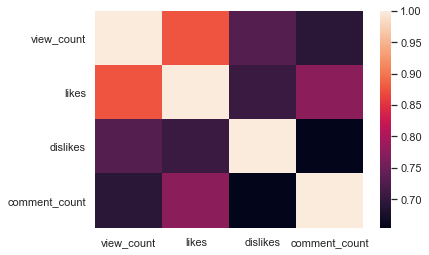

In [26]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(corr)

In [32]:
publish_time = pd.to_datetime(df['publishedAt'])
df_time = pd.DataFrame(columns = ['time'])
df_time['time'] = publish_time.dt.tz_convert('EST')

In [33]:
df_hour = df_time.groupby(df_time["time"].dt.hour).count()

<AxesSubplot:xlabel='time'>

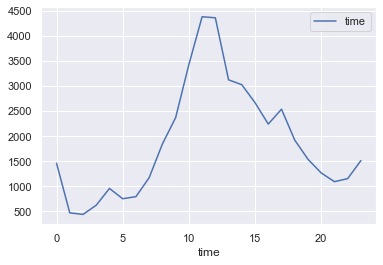

In [34]:
df_hour.plot()

In [46]:
trend_time = pd.to_datetime(df['trending_date'])

df_time_t = pd.DataFrame(columns = ['trend_time'])
df_time_t['trend_time'] = (trend_time - publish_time).dt.days

In [47]:
df_time_t['trend_time']

0        0
1        0
2        0
3        0
4        0
        ..
45140    5
45141    7
45142    6
45143    5
45144    6
Name: trend_time, Length: 45145, dtype: int64

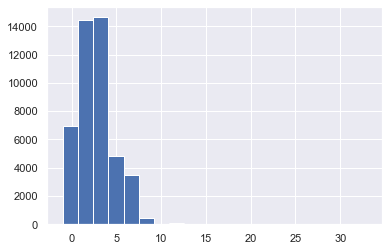

In [52]:
import matplotlib.pyplot as plt
plt.hist(df_time_t['trend_time'], bins = 20)
plt.show()